### Muhammad Kevin Alrahmanto (19/445592/PA/19416)

### Warna untuk plot seaborn

In [ ]:
colors = ['#1f77b4','#d62728',
'#2ca02c',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf']

sns.set_palette(sns.color_palette(colors))

# 1. Eksplorasi Data

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [293]:
df=pd.read_excel('data_pet.xlsx')
df.tail()

,C,V,F,R,ω,L,D,Q
28,12.0,12.0,0.5,4.000000,500,15,240.0,Halus
29,15.0,14.0,2.0,1.000000,0,21,193.0,Halus
30,15.0,15.5,2.0,1.000000,0,22,220.0,Halus
31,12.0,15.0,0.5,2.333333,0,15,120.0,Bermanik
32,20.0,15.0,0.5,2.333333,0,15,490.0,Halus


## 1.1 Statistika Deskriptif

In [276]:
np.round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
C,33.0,17.96,7.06,7.70,12.0,20.00,22.50,30.0
V,33.0,18.05,6.15,10.00,14.0,15.00,26.00,26.0
F,33.0,3.82,5.11,0.05,0.5,1.00,12.00,12.0
R,33.0,1.66,1.14,0.33,1.0,1.00,2.33,4.0
ω,33.0,417.58,465.93,0.00,0.0,300.00,900.00,2000.0
L,33.0,14.15,2.76,10.00,12.0,15.00,15.00,22.0
D,33.0,491.31,334.91,105.00,215.0,471.58,680.00,1800.0


## 1. 2 Pairplot

In [ ]:
sns.set_style({'axes.grid' : False})
sns.pairplot(df, hue='Q', diag_kind='hist')

# 3. Regresi Linear Berganda

## 3.1 Deteksi Outlier 

In [294]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [295]:
def deteksi_outlier(data):
    scaler= StandardScaler()
    data_minmax=pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
    X = sm.add_constant(data_minmax.iloc[:, :-1])  
    Y = data_minmax.iloc[:,-1] 
    model= sm.OLS(Y, X).fit() 
    r_2=model.rsquared
    uji_beta=pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
    return r_2, uji_beta,sm.graphics.influence_plot(model, criterion="cooks")

(0.461134680597446,
                coef  std err             t  P>|t|  [0.025  0.975]
 const  1.804000e-16    0.144  1.250000e-15  1.000  -0.296   0.296
 C      5.931000e-01    0.170  3.492000e+00  0.002   0.244   0.942
 V     -1.780000e-02    0.272 -6.500000e-02  0.948  -0.577   0.541
 F     -5.163000e-01    0.328 -1.572000e+00  0.128  -1.191   0.159
 R     -5.895000e-01    0.169 -3.480000e+00  0.002  -0.938  -0.241
 ω      2.222000e-01    0.219  1.012000e+00  0.321  -0.229   0.673
 L     -6.790000e-02    0.174 -3.900000e-01  0.700  -0.426   0.290,
 <Figure size 576x432 with 1 Axes>)

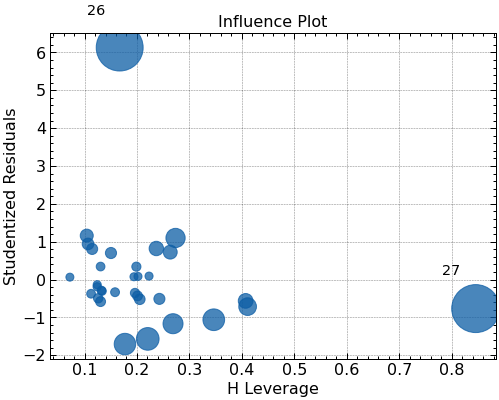

In [296]:
deteksi_outlier(df)

Text(0.5, 1.0, '')

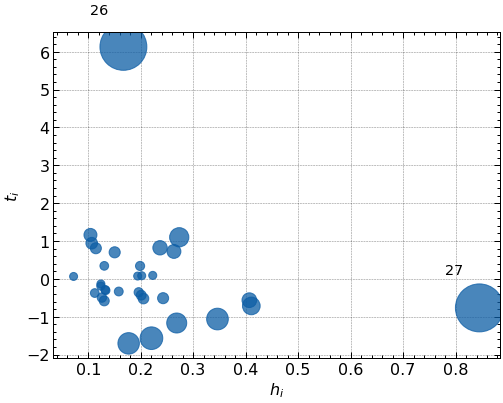

In [297]:
deteksi_outlier(df)
plt.xlabel('$h_i$')
plt.ylabel('$t_i$')
plt.title('')

In [298]:
# 2 observasi dihapus
df_2=df.copy()
df_2.drop(df.index[[26,27]], inplace=True)

In [299]:
df_2.tail(8)

,C,V,F,R,ω,L,D,Q
23,12.0,20.0,0.5,0.333333,300,15,529.0,Bermanik
24,12.0,20.0,1.0,0.333333,300,15,212.0,Bermanik
25,15.0,17.0,1.4,0.333333,420,20,842.0,Halus
28,12.0,12.0,0.5,4.000000,500,15,240.0,Halus
29,15.0,14.0,2.0,1.000000,0,21,193.0,Halus
30,15.0,15.5,2.0,1.000000,0,22,220.0,Halus
31,12.0,15.0,0.5,2.333333,0,15,120.0,Bermanik
32,20.0,15.0,0.5,2.333333,0,15,490.0,Halus


(0.6925430144845262,
                coef  std err             t  P>|t|  [0.025  0.975]
 const  2.047000e-16    0.113  1.810000e-15  1.000  -0.234   0.234
 C      7.211000e-01    0.142  5.078000e+00  0.000   0.428   1.014
 V     -6.509000e-01    0.229 -2.847000e+00  0.009  -1.123  -0.179
 F     -9.328000e-01    0.327 -2.851000e+00  0.009  -1.608  -0.258
 R     -6.145000e-01    0.125 -4.914000e+00  0.000  -0.873  -0.356
 ω      1.132400e+00    0.308  3.682000e+00  0.001   0.498   1.767
 L     -1.720000e-01    0.138 -1.248000e+00  0.224  -0.457   0.113,
 <Figure size 576x432 with 1 Axes>)

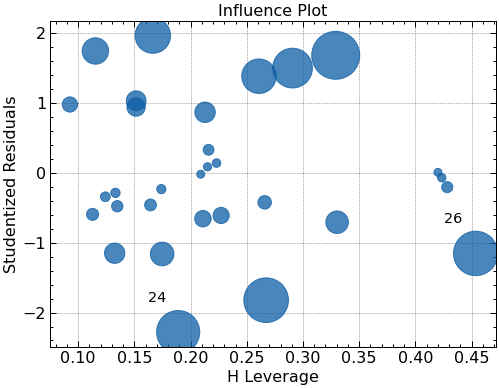

In [300]:
deteksi_outlier(df_2)

Text(0.5, 1.0, '')

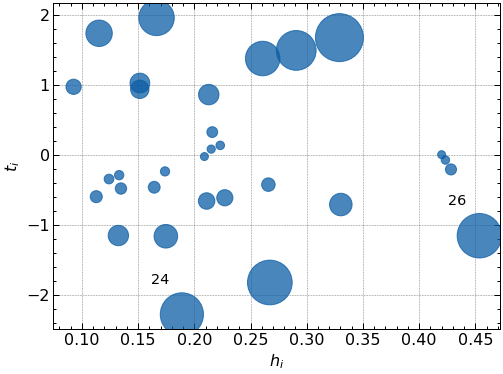

In [301]:
deteksi_outlier(df_2)
plt.xlabel('$h_i$')
plt.ylabel('$t_i$')
plt.title('')

## 3.2 Analisis Regresi

In [302]:
df_final=pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_final.tail()

,C,V,F,R,ω,L,D
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,-0.762019
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,-0.904531
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,-0.822663
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,-1.125880
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,-0.003977


In [303]:
X = sm.add_constant(df_final.iloc[:, :-1])  
Y = df_final.iloc[:,-1] 
model_1= sm.OLS(Y, X).fit() 

In [304]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.708
Date:                Wed, 08 Mar 2023   Prob (F-statistic):            0.00851
Time:                        14:05:09   Log-Likelihood:                -36.623
No. Observations:                  33   AIC:                             87.25
Df Residuals:                      26   BIC:                             97.72
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.144   1.25e-15      1.000      -0.296       0.296
C              0.5931      0.170      3.492      0.002       0.244       0.942
V             -0.0178      0.272     -0.065      0.948      -0.577       0.541
F             -0.5163      0.328     -1.572      0.128      -1.191       0.159
R             -0.5895      0.169     -3.480      0.002      -0.938      -0.241
ω              0.2222      0.219      1.012      0.321      -0.229       0.673
L             -0.0679      0.174     -0.390      0.700      -0.426       0.290
==============================================================================
Omnibus:                       28.037   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.282
Skew:                           1.852   Prob(JB):                     2.45e-15
Kurtosis:                       8.934   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
df_final2=pd.DataFrame(scaler.fit_transform(df_2.iloc[:, :-1]), columns=df_2.columns[:-1])
df_final2.tail()

,C,V,F,R,ω,L,D
26,-0.848883,-1.005842,-0.677394,2.229391,0.325064,0.322800,-0.917412
27,-0.416775,-0.680191,-0.386043,-0.558061,-1.029370,2.467115,-1.114756
28,-0.416775,-0.435952,-0.386043,-0.558061,-1.029370,2.824501,-1.001388
29,-0.848883,-0.517365,-0.677394,0.680806,-1.029370,0.322800,-1.421270
30,0.303405,-0.517365,-0.677394,0.680806,-1.029370,0.322800,0.132293


In [310]:
X = sm.add_constant(df_final2.iloc[:, :-1])  
Y = df_final2.iloc[:,-1] 
model_2= sm.OLS(Y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     9.010
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.33e-05
Time:                        14:11:20   Log-Likelihood:                -25.706
No. Observations:                  31   AIC:                             65.41
Df Residuals:                      24   BIC:                             75.45
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.047e-16      0.113   1.81e-15      1.000      -0.234       0.234
C              0.7211      0.142      5.078      0.000       0.428       1.014
V             -0.6509      0.229     -2.847      0.009      -1.123      -0.179
F             -0.9328      0.327     -2.851      0.009      -1.608      -0.258
R             -0.6145      0.125     -4.914      0.000      -0.873      -0.356
ω              1.1324      0.308      3.682      0.001       0.498       1.767
L             -0.1720      0.138     -1.248      0.224      -0.457       0.113
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   2.355
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.522
Skew:                           0.144   Prob(JB):                        0.770
Kurtosis:                       2.433   Cond. No.                         6.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [306]:
import statsmodels
import statsmodels.formula.api as smf
import pandas as pd
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.use(['notebook', 'grid']):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)


        ax.set_xlabel('Data')
        ax.set_ylabel('Residu')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)


        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)



        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y

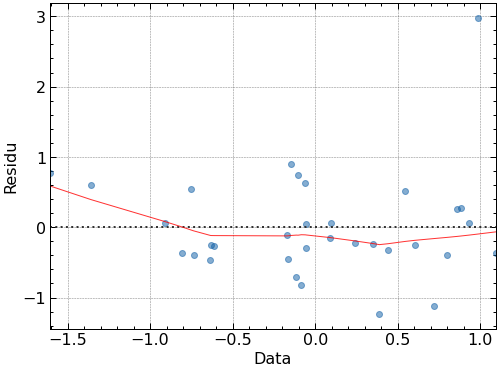

In [307]:
cls_1 = Linear_Reg_Diagnostic(model_1)
cls_1.residual_plot();

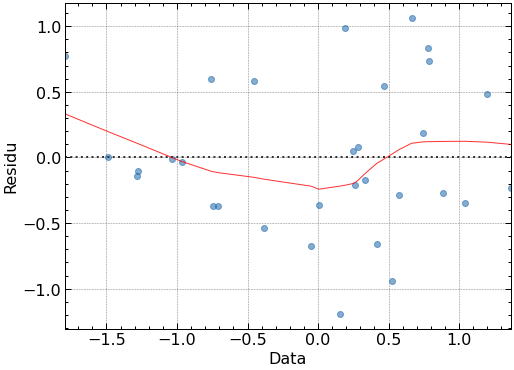

In [312]:
cls_2 = Linear_Reg_Diagnostic(model_2)
cls_2.residual_plot();

# 3.3 Semua Kombinasi yang mungkin

In [314]:
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [315]:
df_final.head()

,C,V,F,R,ω,L,D
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,-0.880274
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.856016
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,-0.837823
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0.014216
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.355708


In [316]:
# Load the California Housing dataset
X = np.array(df_final.iloc[:, :-1])
y =np.array(df_final.iloc[:, -1])

In [317]:
# Calculate all possible combinations of features
n_features = X.shape[1]
all_combinations = [combinations(range(n_features), i+1) for i in range(n_features)]
all_combinations = [item for sublist in all_combinations for item in sublist]

# Initialize an empty list to store mean squared errors for each subset
r_2 = []

# Fit a linear regression model to each subset and store its mean squared error
for i, subset in enumerate(all_combinations):
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X[:, list(subset)], y)
    y_pred = lr.predict(X[:, list(subset)])
    r_2.append(  1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum()  )

In [318]:
res=pd.DataFrame(np.stack([all_combinations, r_2])).T
res['length']=res[0].apply(lambda x : len(x))
res[res['length']==1]

C:\Users\Kevin\anaconda3\lib\site-packages\numpy\core\shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


,0,1,length
0,"(0,)",0.167773,1
1,"(1,)",0.016106,1
2,"(2,)",0.012152,1
3,"(3,)",0.129575,1
4,"(4,)",0.057247,1
5,"(5,)",0.0,1


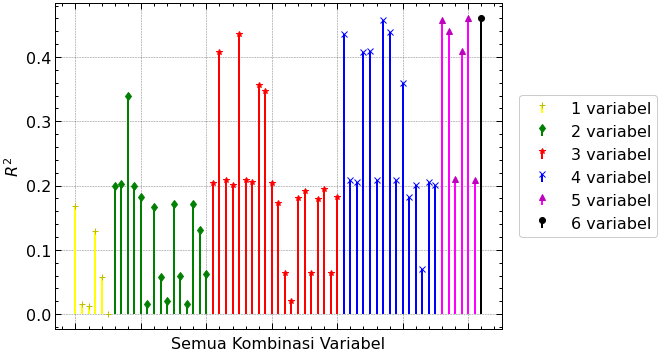

In [335]:
# Plot each subset versus mean squared error
plt.stem( res[res['length']==1][1].index,res[res['length']==1][1],linefmt='yellow', markerfmt='y+',label ='1 variabel',basefmt=" " )
plt.stem( res[res['length']==2][1].index,res[res['length']==2][1],linefmt='green', markerfmt='gd',label ='2 variabel',basefmt=" " )
plt.stem( res[res['length']==3][1].index,res[res['length']==3][1],linefmt='red', markerfmt='r*',label ='3 variabel',basefmt=" " )
plt.stem( res[res['length']==4][1].index,res[res['length']==4][1],linefmt='blue', markerfmt='bx',label ='4 variabel',basefmt=" " )
plt.stem( res[res['length']==5][1].index,res[res['length']==5][1],linefmt='magenta', markerfmt='m^',label ='5 variabel',basefmt=" " )
plt.stem( res[res['length']==6][1].index,res[res['length']==6][1],linefmt='black', markerfmt='ko',label ='6 variabel',basefmt=" " )
plt.xlabel('Semua Kombinasi Variabel')
plt.ylabel('$R^2$')
plt.tick_params(labelbottom = False)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)


In [320]:
result=pd.DataFrame(np.stack([all_combinations, r_2])).T.sort_values(1).tail(10)
result[::-1]

C:\Users\Kevin\anaconda3\lib\site-packages\numpy\core\shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


,0,1
62,"(0, 1, 2, 3, 4, 5)",0.461135
60,"(0, 2, 3, 4, 5)",0.461046
56,"(0, 1, 2, 3, 4)",0.457986
47,"(0, 2, 3, 4)",0.457969
57,"(0, 1, 2, 3, 5)",0.439904
48,"(0, 2, 3, 5)",0.439478
41,"(0, 1, 2, 3)",0.436097
25,"(0, 2, 3)",0.436058
59,"(0, 1, 3, 4, 5)",0.40993
45,"(0, 1, 3, 5)",0.409392


# 3.4 Suku interaksi (nteraction Term)

In [325]:
df_it=df_final.copy()
df_it.head()

,C,V,F,R,ω,L,D
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,-0.880274
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.856016
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,-0.837823
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0.014216
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,-0.355708


In [326]:
X_it= df_it.iloc[:, :-1] 
Y_it = pd.DataFrame(df_it.iloc[:,-1])

In [327]:
X_it.head()

,C,V,F,R,ω,L
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844


In [328]:
Y_it.head()

,D
0,-0.880274
1,-0.856016
2,-0.837823
3,0.014216
4,-0.355708


In [329]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_it=poly.fit_transform(X_it)
poly.get_feature_names_out()

array(['C', 'V', 'F', 'R', 'ω', 'L', 'C V', 'C F', 'C R', 'C ω', 'C L',
       'V F', 'V R', 'V ω', 'V L', 'F R', 'F ω', 'F L', 'R ω', 'R L',
       'ω L'], dtype=object)

In [330]:
len(poly.get_feature_names_out())

21

In [331]:
X_it=pd.DataFrame(X_it, columns=poly.get_feature_names_out())
X_it

,C,V,F,R,ω,L,C V,C F,C R,C ω,...,V F,V R,V ω,V L,F R,F ω,F L,R ω,R L,ω L
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,-1.504294,-1.859830,1.246173,-1.204146,...,2.133215,-1.429354,1.381149,-1.038814,-1.767179,1.707580,-1.284336,-1.144159,0.860565,-0.831542
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,-1.504294,-1.859830,0.665603,-1.204146,...,2.133215,-0.763443,1.381149,-1.038814,-0.943881,1.707580,-1.284336,-0.611115,0.459643,-0.831542
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,-1.504294,-1.859830,-0.689060,-1.204146,...,2.133215,0.790349,1.381149,-1.038814,0.977146,1.707580,-1.284336,0.632652,-0.475842,-0.831542
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0.385379,0.476462,-0.319252,0.308485,...,2.133215,-1.429354,1.381149,-1.038814,-1.767179,1.707580,-1.284336,-1.144159,0.860565,-0.831542
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,0.385379,0.476462,-0.170518,0.308485,...,2.133215,-0.763443,1.381149,-1.038814,-0.943881,1.707580,-1.284336,-0.611115,0.459643,-0.831542
5,0.293387,1.313551,1.624006,0.601689,1.051462,-0.790844,0.385379,0.476462,0.176527,0.308485,...,2.133215,0.790349,1.381149,-1.038814,0.977146,1.707580,-1.284336,0.632652,-0.475842,-0.831542
6,1.731985,1.313551,1.624006,-1.088160,1.051462,-0.790844,2.275051,2.812754,-1.884677,1.821116,...,2.133215,-1.429354,1.381149,-1.038814,-1.767179,1.707580,-1.284336,-1.144159,0.860565,-0.831542
7,1.731985,1.313551,1.624006,-0.581206,1.051462,-0.790844,2.275051,2.812754,-1.006639,1.821116,...,2.133215,-0.763443,1.381149,-1.038814,-0.943881,1.707580,-1.284336,-0.611115,0.459643,-0.831542
8,1.731985,1.313551,1.624006,0.601689,1.051462,-0.790844,2.275051,2.812754,1.042115,1.821116,...,2.133215,0.790349,1.381149,-1.038814,0.977146,1.707580,-1.284336,0.632652,-0.475842,-0.831542
9,-1.476089,-0.668035,-0.748938,-0.581206,-0.060102,0.311882,0.986078,1.105499,0.857911,0.088716,...,0.500317,0.388265,0.040150,-0.208348,0.435287,0.045013,-0.233580,0.034932,-0.181268,-0.018745


In [333]:
model_iaterm= sm.OLS(Y_it,sm.add_constant(X_it)).fit() 
model_iaterm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     50.17
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           4.41e-08
Time:                        14:23:15   Log-Likelihood:                 28.621
No. Observations:                  33   AIC:                            -13.24
Df Residuals:                      11   BIC:                             19.68
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8664      1.699     -3.454      0.005      -9.605      -2.128
C              0.4003      0.325      1.233      0.243      -0.314       1.115
V            -27.1604      3.605     -7.533      0.000     -35.096     -19.225
F              5.6164      1.501      3.741      0.003       2.312       8.921
R             -3.5534      0.484     -7.341      0.000      -4.619      -2.488
ω              3.3838      2.429      1.393      0.191      -1.962       8.730
L            -22.7027      2.483     -9.143      0.000     -28.168     -17.237
C V           -0.1938      0.273     -0.710      0.493      -0.795       0.407
C F            0.1993      0.943      0.211      0.836      -1.876       2.274
C R           -0.1089      0.070     -1.565      0.146      -0.262       0.044
C ω           -0.9482      1.070     -0.886      0.394      -3.303       1.406
C L           -1.1827      0.360     -3.282      0.007      -1.976      -0.390
V F          -12.3346      2.898     -4.257      0.001     -18.713      -5.957
V R           -8.1019      1.267     -6.394      0.000     -10.891      -5.313
V ω          -28.9881      4.842     -5.986      0.000     -39.646     -18.330
V L           -3.6669      1.371     -2.674      0.022      -6.685      -0.649
F R            2.3733      0.706      3.359      0.006       0.818       3.928
F ω           34.3576      8.208      4.186      0.002      16.291      52.424
F L           -4.3644      4.586     -0.952      0.362     -14.458       5.729
R ω           -3.4697      0.618     -5.615      0.000      -4.830      -2.110
R L          -17.5696      2.431     -7.227      0.000     -22.921     -12.219
ω L          -10.5904      1.337     -7.919      0.000     -13.534      -7.647
==============================================================================
Omnibus:                        0.349   Durbin-Watson:                   2.660
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.519
Skew:                          -0.122   Prob(JB):                        0.771
Kurtosis:                       2.436   Cond. No.                         930.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 3.5  Lasso

### Regresi Linear Sederhana Lasso

In [412]:
from matplotlib.lines import Line2D
from sklearn.linear_model import Lasso

# Load the dataset
X= df_final.iloc[:, :-1] 
y = df_final.iloc[:,-1] 
model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-4, 1, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


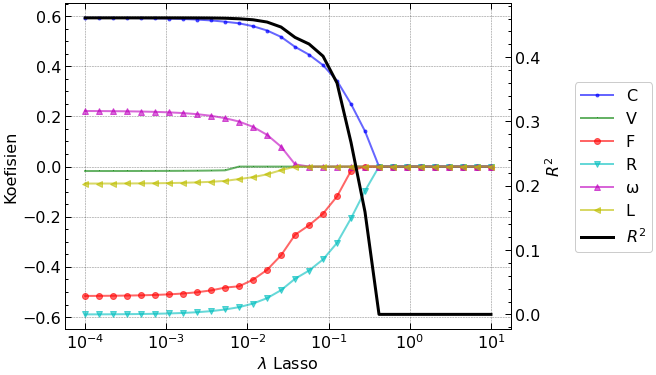

In [413]:
fig, ax1 = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
marker = list(Line2D.markers)
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)],color=colors[i % len(colors)], label=df.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=1)

In [414]:
model = sm.OLS(y, X)
results_fu = model.fit()
frames = []
for n in np.arange(0.01, 0.11, 0.015).tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.rsquared))

    df = pd.DataFrame(frames, columns=list(X.columns)+['R2'])
df.index=np.arange(0.01, 0.11, 0.015).tolist()
df.index.name = 'Lambda'
np.round(df.T,3)

Lambda,0.010,0.025,0.040,0.055,0.070,0.085,0.100
C,0.565,0.520,0.472,0.450,0.427,0.405,0.382
V,0.000,0.000,0.000,0.000,0.000,0.000,0.000
F,-0.463,-0.360,-0.263,-0.238,-0.213,-0.188,-0.163
R,-0.552,-0.496,-0.442,-0.418,-0.394,-0.371,-0.347
ω,0.168,0.085,0.001,0.000,0.000,0.000,0.000
L,-0.046,-0.016,0.000,0.000,0.000,0.000,0.000
R2,0.459,0.448,0.429,0.422,0.413,0.402,0.389


In [415]:
results_fr = model.fit_regularized(L1_wt=1, alpha=0.055, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      D   R-squared (uncentered):                   0.422
Model:                            OLS   Adj. R-squared (uncentered):              0.293
Method:                 Least Squares   F-statistic:                              3.282
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                      0.0148
Time:                        15:44:58   Log-Likelihood:                         -37.788
No. Observations:                  33   AIC:                                      87.58
Df Residuals:                      27   BIC:                                      96.55
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C              0.4496      0.173      2.605      0.015       0.095       0.804
V                   0      0.276          0      1.000      -0.567       0.567
F             -0.2378      0.334     -0.712      0.482      -0.923       0.447
R             -0.4182      0.172     -2.428      0.022      -0.772      -0.065
ω                   0      0.223          0      1.000      -0.458       0.458
L                   0      0.177          0      1.000      -0.363       0.363
==============================================================================
Omnibus:                       28.987   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.211
Skew:                           1.906   Prob(JB):                     2.09e-16
Kurtosis:                       9.163   Cond. No.                         4.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regresi Linear dengan Suku Interaksi Lasso

In [416]:
X= X_it
y =Y_it ['D']

The difference is that sklearn's Ridge scales the penalty term as alpha / n where n is the number of observations. statsmodels does not apply this scaling of the tuning parameter. You can have the ridge implementations match if you re-scale the penalty for statsmodels.

In [420]:
model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-2, 0, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


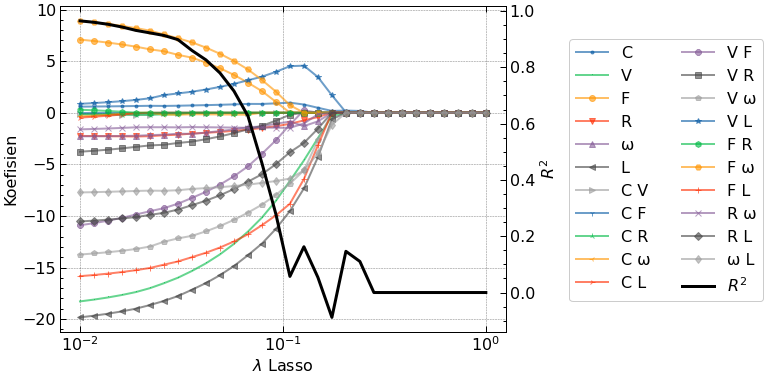

In [421]:
fig, ax1 = plt.subplots()
marker = list(Line2D.markers)
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)], label=X_it.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=2)

In [424]:
model = sm.OLS(y, X)
results_fu = model.fit()
frames = []
for n in (np.arange(0.01, 0.11, 0.015)).tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.rsquared))

    df = pd.DataFrame(frames, columns=list(X.columns)+['R2'])
df.index=np.arange(0.01, 0.11, 0.015).tolist()
df.index.name = 'Lambda'
np.round(df.T,3)

Lambda,0.010,0.025,0.040,0.055,0.070,0.085,0.100
C,0.586,0.652,0.726,0.796,0.866,0.875,0.940
V,-18.282,-16.631,-14.805,-12.996,-11.186,-9.414,-7.606
F,7.081,6.025,4.996,3.845,2.697,1.618,0.470
R,-2.251,-2.195,-1.970,-1.788,-1.607,-1.402,-1.217
ω,-2.290,-2.152,-1.960,-1.661,-1.365,-1.208,-0.919
L,-19.830,-18.333,-16.691,-15.104,-13.516,-12.029,-10.443
C V,-0.130,0.000,0.000,0.000,0.000,0.000,0.000
C F,0.000,0.000,0.000,0.000,0.000,0.000,0.000
C R,-0.150,-0.152,0.000,0.000,0.000,0.000,0.000
C ω,-0.358,-0.183,-0.156,-0.177,-0.199,0.000,0.000


# 3.6 Ridge

# Regresi Linear Sederhana Ridge

In [442]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

X= df_final.iloc[:, :-1] 
y = df_final.iloc[:,-1] 
# Fit the Lasso regression model with different alpha values
alphas = np.logspace(-4, 3, 30)
coefs = []
r_2=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    y_pred = ridge.predict(X)
    r_2.append(1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


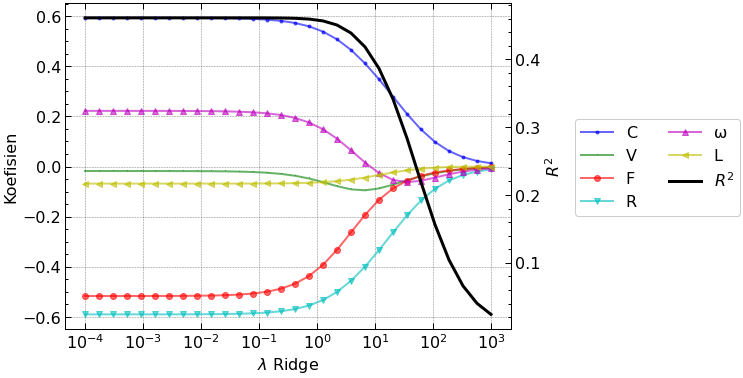

In [443]:
fig, ax1 = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
marker = list(Line2D.markers)
#marker=['-o', '-s', '-^', '-D', '-p', '-*']
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)],color=colors[i % len(colors)], label=df.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Ridge")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)

fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=2)
plt.show()

In [445]:
model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-2, 2, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)
results_fr = model.fit_regularized(L1_wt=0, alpha=0.1, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      D   R-squared (uncentered):                   0.443
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              3.576
Date:                Wed, 08 Mar 2023   Prob (F-statistic):                     0.00975
Time:                        16:07:40   Log-Likelihood:                         -37.175
No. Observations:                  33   AIC:                                      86.35
Df Residuals:                      27   BIC:                                      95.33
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C              0.4782      0.169      2.822      0.009       0.131       0.826
V             -0.0880      0.271     -0.324      0.748      -0.645       0.469
F             -0.2825      0.328     -0.862      0.396      -0.955       0.390
R             -0.4691      0.169     -2.775      0.010      -0.816      -0.122
ω              0.0785      0.219      0.359      0.723      -0.371       0.528
L             -0.0541      0.174     -0.311      0.758      -0.411       0.303
==============================================================================
Omnibus:                       32.890   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.587
Skew:                           2.123   Prob(JB):                     1.06e-21
Kurtosis:                      10.227   Cond. No.                         4.74
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Suku Interaksi Ridge

In [428]:
X= X_it
y =Y_it ['D']

In [434]:
model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-2, 2, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


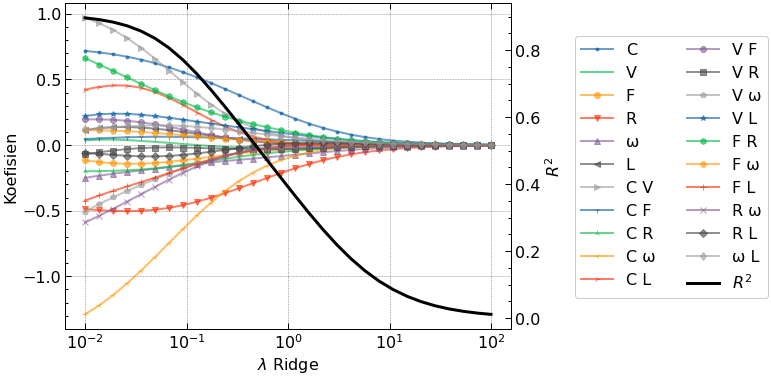

In [435]:
fig, ax1 = plt.subplots()
marker = list(Line2D.markers)
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)], label=X_it.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Ridge")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=2)

In [431]:
model = sm.OLS(y, X)
results_fu = model.fit()
frames = []
for n in (np.arange(0.01, 0.11, 0.015)).tolist():
    results_fr = model.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.rsquared))

    df = pd.DataFrame(frames, columns=list(X.columns)+['R2'])
df.index=np.arange(0.01, 0.11, 0.015).tolist()
df.index.name = 'Lambda'
np.round(df.T,3)

Lambda,0.010,0.025,0.040,0.055,0.070,0.085,0.100
C,0.586,0.652,0.726,0.796,0.866,0.875,0.940
V,-18.282,-16.631,-14.805,-12.996,-11.186,-9.414,-7.606
F,7.081,6.025,4.996,3.845,2.697,1.618,0.470
R,-2.251,-2.195,-1.970,-1.788,-1.607,-1.402,-1.217
ω,-2.290,-2.152,-1.960,-1.661,-1.365,-1.208,-0.919
L,-19.830,-18.333,-16.691,-15.104,-13.516,-12.029,-10.443
C V,-0.130,0.000,0.000,0.000,0.000,0.000,0.000
C F,0.000,0.000,0.000,0.000,0.000,0.000,0.000
C R,-0.150,-0.152,0.000,0.000,0.000,0.000,0.000
C ω,-0.358,-0.183,-0.156,-0.177,-0.199,0.000,0.000


# 3.7 Suku Polinomial

In [455]:
df_poly=df_final.copy()
df_poly.head()

X_poly= df_it.iloc[:, :-1] 
Y_poly = pd.DataFrame(df_it.iloc[:,-1])

In [458]:
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3=poly3.fit_transform(X_poly)
poly3.get_feature_names_out()
X_poly3=pd.DataFrame(X_poly3, columns=poly3.get_feature_names_out())
X_poly3.head()

,C,V,F,R,ω,L,C^2,C V,C F,C R,...,R^3,R^2 ω,R^2 L,R ω^2,R ω L,R L^2,ω^3,ω^2 L,ω L^2,L^3
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,1.311509,-1.504294,-1.859830,1.246173,...,-1.288482,1.245028,-0.936432,-1.203039,0.904851,-0.680573,1.162467,-0.874335,0.65762,-0.494621
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,1.311509,-1.504294,-1.859830,0.665603,...,-0.196331,0.355184,-0.267147,-0.642564,0.483297,-0.363506,1.162467,-0.874335,0.65762,-0.494621
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,1.311509,-1.504294,-1.859830,-0.689060,...,0.217829,0.380660,-0.286309,0.665210,-0.500329,0.376317,1.162467,-0.874335,0.65762,-0.494621
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0.086076,0.385379,0.476462,-0.319252,...,-1.288482,1.245028,-0.936432,-1.203039,0.904851,-0.680573,1.162467,-0.874335,0.65762,-0.494621
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,0.086076,0.385379,0.476462,-0.170518,...,-0.196331,0.355184,-0.267147,-0.642564,0.483297,-0.363506,1.162467,-0.874335,0.65762,-0.494621


# Derajat 3

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8024\2185993623.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


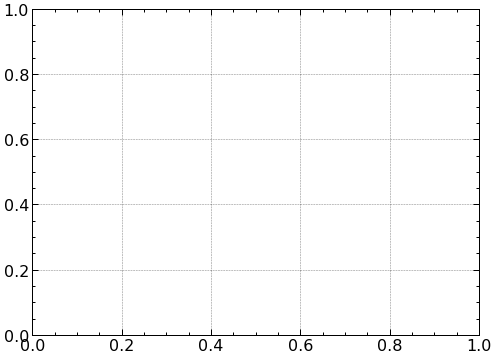

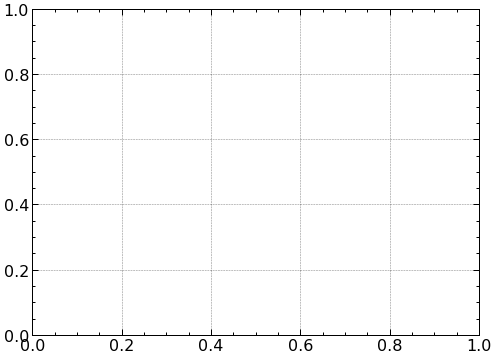

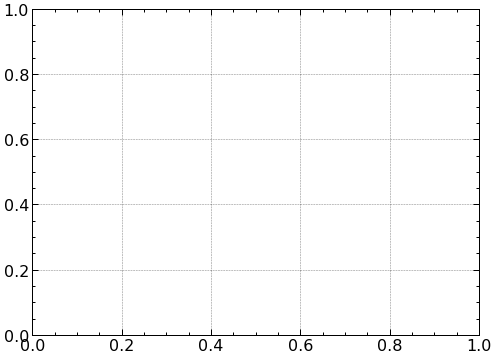

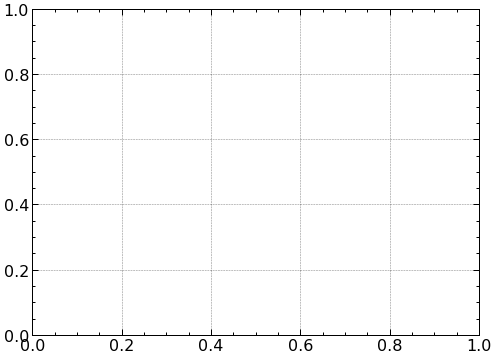

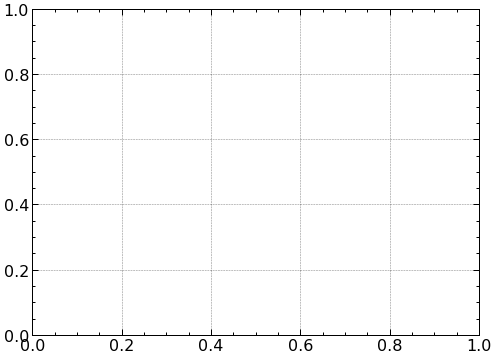

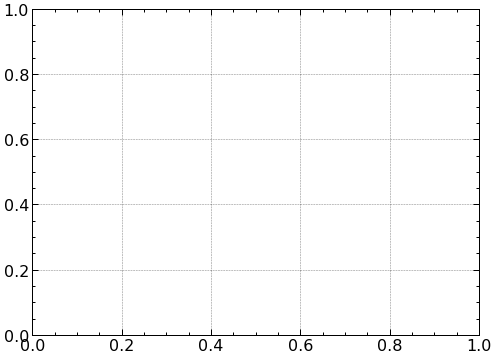

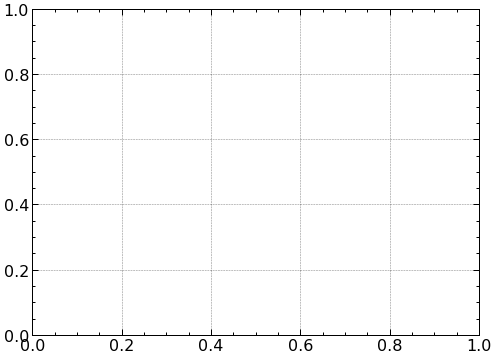

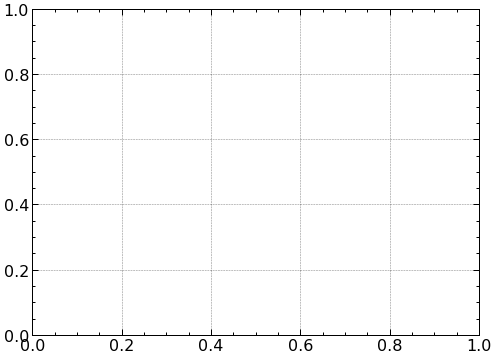

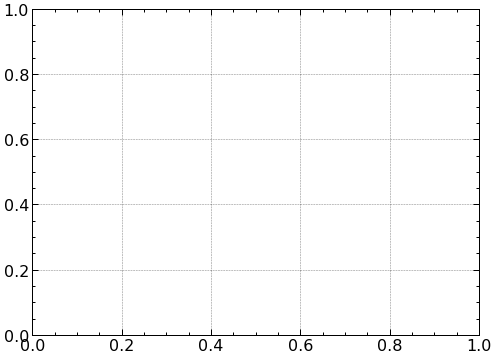

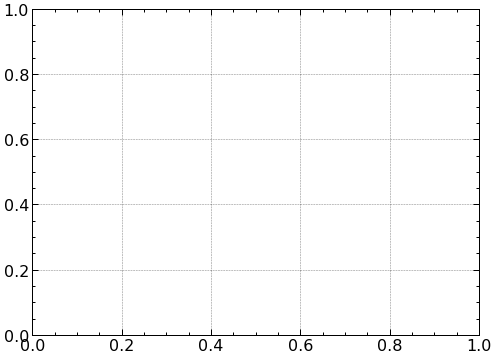

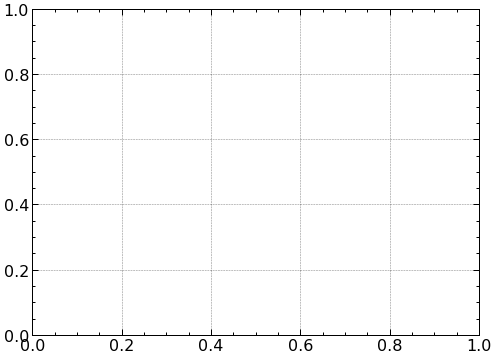

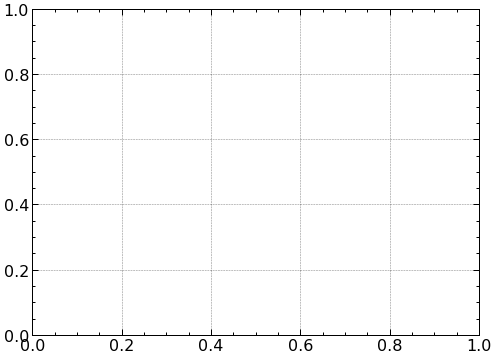

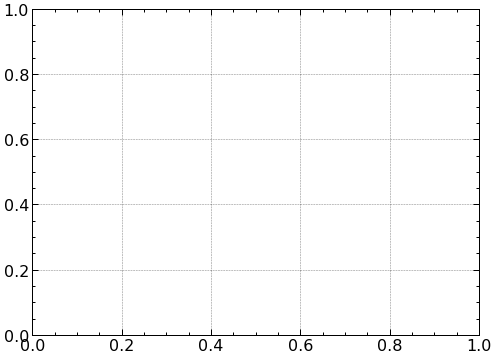

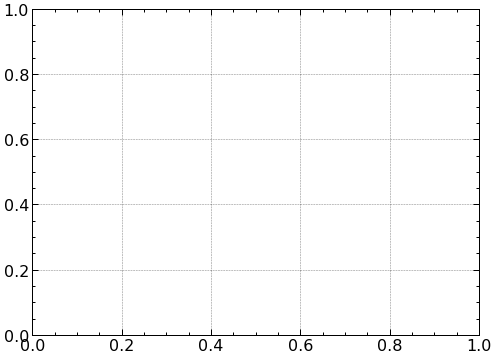

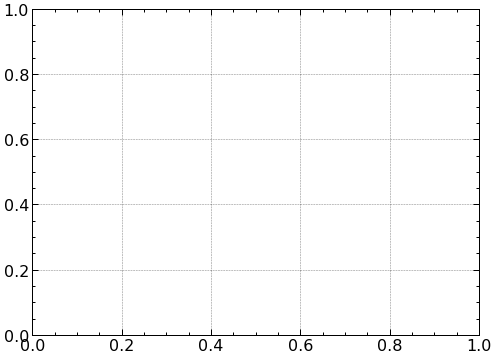

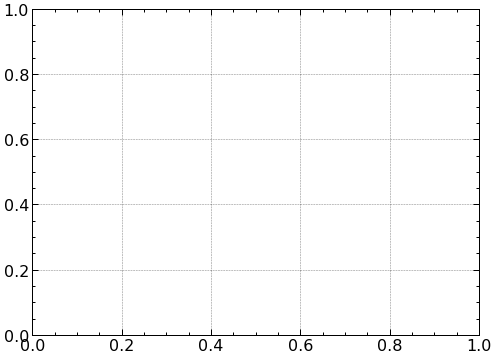

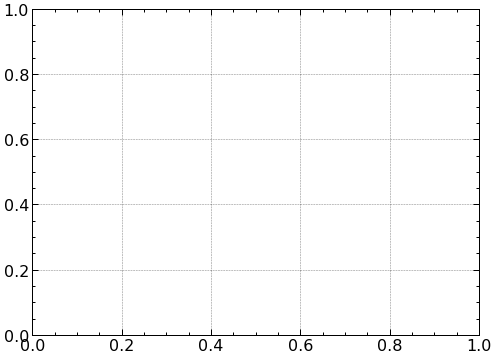

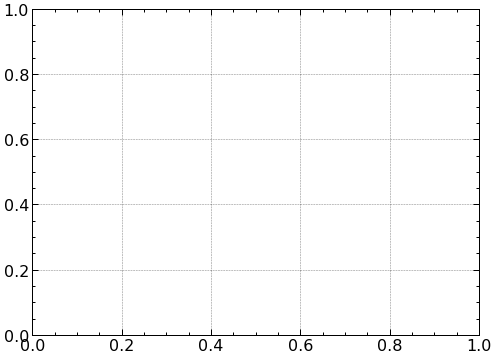

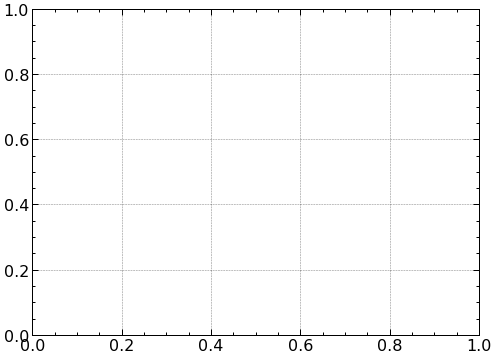

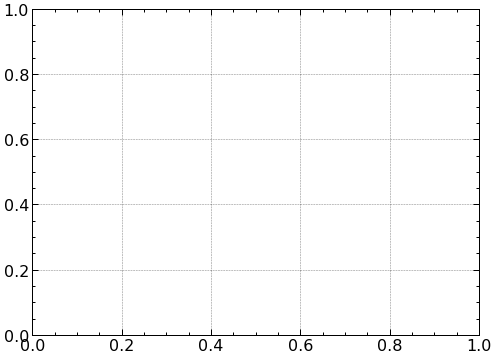

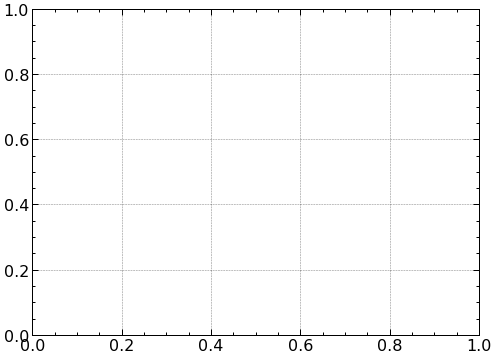

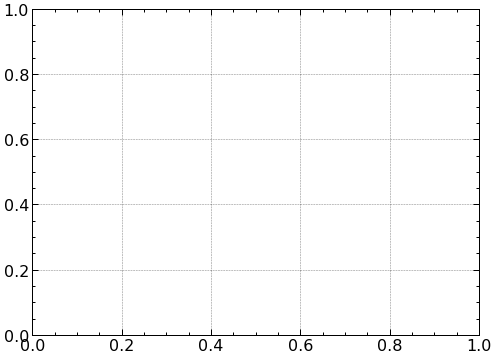

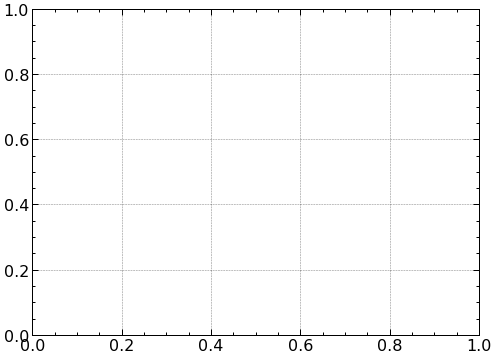

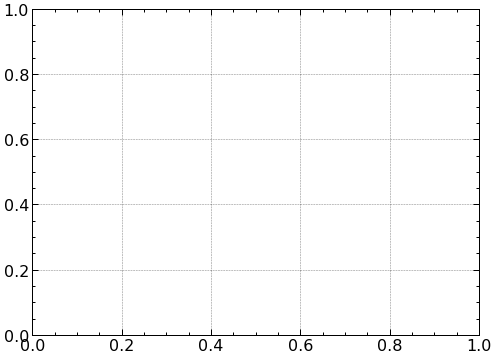

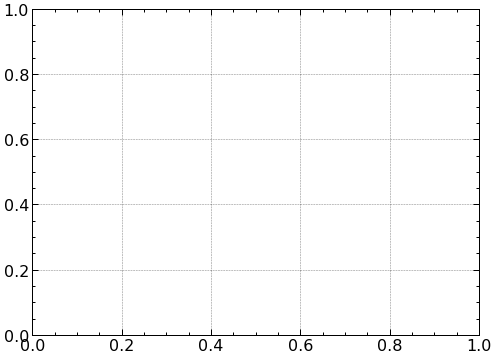

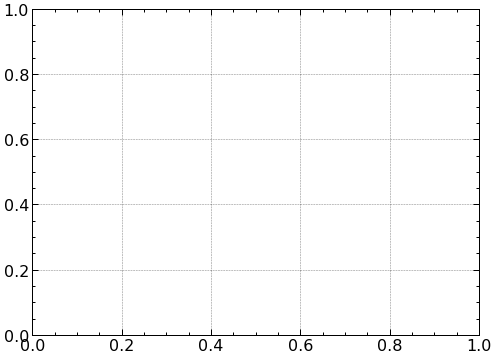

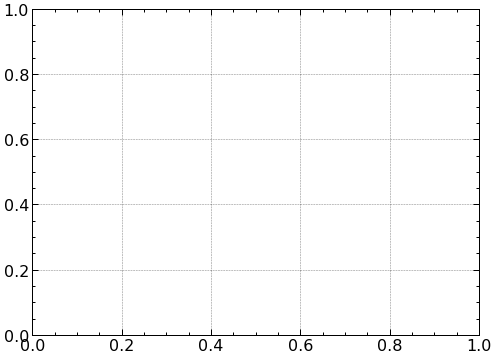

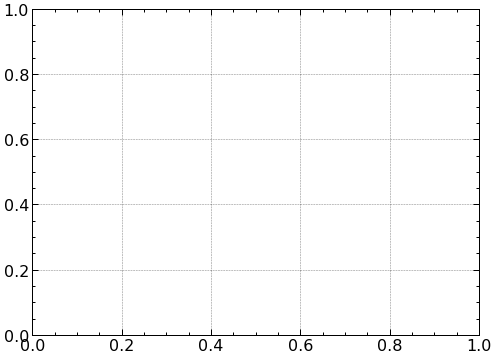

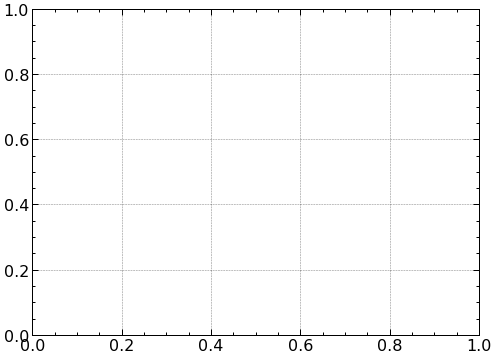

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


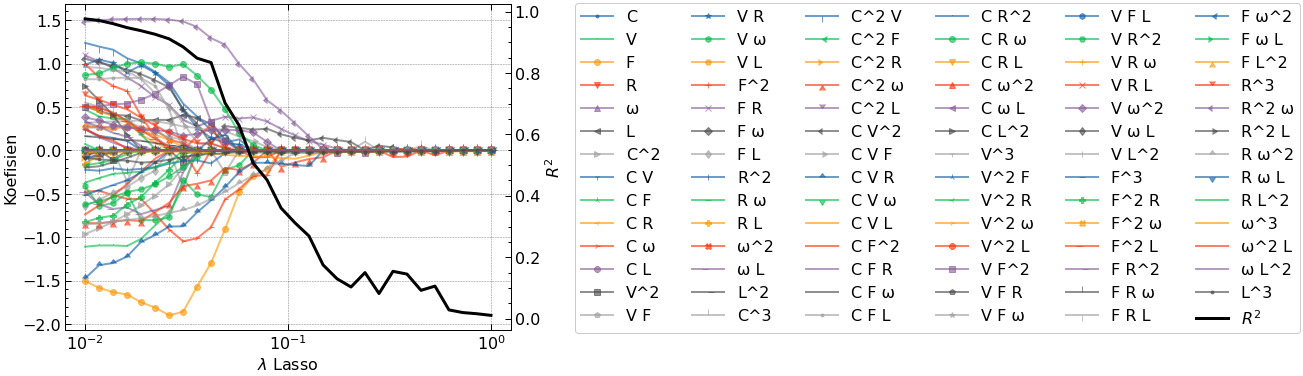

In [468]:
X= X_poly3
y =Y_poly ['D']

model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-2, 0, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)
    fig, ax1 = plt.subplots()
marker = list(Line2D.markers)
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)], label=X_poly3.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=6)

In [469]:
model = sm.OLS(y, X)
results_fu = model.fit()
frames = []
for n in (np.arange(0.01, 0.11, 0.015)).tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.rsquared))

    df = pd.DataFrame(frames, columns=list(X.columns)+['R2'])
df.index=np.arange(0.01, 0.11, 0.015).tolist()
df.index.name = 'Lambda'
np.round(df.T,3)

Lambda,0.010,0.025,0.040,0.055,0.070,0.085,0.100
C,-0.022,0.000,0.000,0.000,0.000,0.000,0.000
V,-1.108,-0.769,0.000,0.000,0.000,0.000,0.000
F,-1.505,-1.851,-1.463,-0.514,-0.371,-0.104,0.000
R,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ω,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
ω^3,-0.011,-0.015,-0.033,-0.059,-0.069,-0.078,-0.091
ω^2 L,0.247,0.000,0.000,0.000,0.000,0.000,0.000
ω L^2,0.000,0.000,0.000,0.000,0.000,0.000,0.000
L^3,-0.081,-0.116,-0.049,-0.018,-0.021,-0.024,-0.026


In [470]:
results_fr = model.fit_regularized(L1_wt=1, alpha=0.04, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                 -2.395
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Wed, 08 Mar 2023   Prob (F-statistic):              0.972
Time:                        17:32:28   Log-Likelihood:                -21.244
No. Observations:                  33   AIC:                             104.5
Df Residuals:                       2   BIC:                             150.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C                   0      7.564          0      1.000     -32.543      32.543
V                   0      4.873          0      1.000     -20.968      20.968
F             -1.4626      4.953     -0.295      0.796     -22.773      19.847
R                   0      2.875          0      1.000     -12.368      12.368
ω                   0      5.964          0      1.000     -25.660      25.660
L              0.3331      1.422      0.234      0.837      -5.785       6.451
C^2                 0      4.544          0      1.000     -19.551      19.551
C V                 0      3.737          0      1.000     -16.079      16.079
C F                 0      7.154          0      1.000     -30.782      30.782
C R                 0     10.888          0      1.000     -46.849      46.849
C ω           -0.7167      2.140     -0.335      0.770      -9.926       8.493
C L                 0      3.264          0      1.000     -14.045      14.045
V^2                 0      2.672          0      1.000     -11.496      11.496
V F           -0.4178      4.486     -0.093      0.934     -19.720      18.885
V R            0.0967      1.865      0.052      0.963      -7.929       8.123
V ω           -0.3098      2.016     -0.154      0.892      -8.984       8.364
V L                 0      1.689          0      1.000      -7.267       7.267
F^2                 0      3.430          0      1.000     -14.759      14.759
F R            0.3895      5.480      0.071      0.950     -23.190      23.969
F ω                 0      2.263          0      1.000      -9.739       9.739
F L                 0      2.363          0      1.000     -10.166      10.166
R^2           -0.1712      2.393     -0.072      0.949     -10.469      10.127
R ω                 0      6.261          0      1.000     -26.941      26.941
R L                 0      2.633          0      1.000     -11.327      11.327
ω^2            0.0361     12.279      0.003      0.998     -52.795      52.867
ω L                 0      2.243          0      1.000      -9.651       9.651
L^2                 0      0.997          0      1.000      -4.290       4.290
C^3                 0      6.134          0      1.000     -26.391      26.391
C^2 V          0.1756     12.979      0.014      0.990     -55.668      56.019
C^2 F               0     14.472          0      1.000     -62.267      62.267
C^2 R               0      0.903          0      1.000      -3.885       3.885
C^2 ω         -0.2357      7.746     -0.030      0.978     -33.565      33.094
C^2 L               0      4.066          0      1.000     -17.494      17.494
C V^2          0.3243      9.355      0.035      0.975     -39.929      40.578
C V F          0.2595      4.521      0.057      0.959     -19.193      19.712
C V R         -0.5656      9.549     -0.059      0.958     -41.652      40.521
C 

In [473]:
results_summary = final.summary()
results_as_html = results_summary.tables[1].as_html()
poly3=pd.read_html(results_as_html, header=0, index_col=0)[0]

In [477]:
poly3[poly3['coef'] != 0]

,coef,std err,t,P>|t|,[0.025,0.975]
F,-1.4626,4.953,-0.295,0.796,-22.773,19.847
L,0.3331,1.422,0.234,0.837,-5.785,6.451
C ω,-0.7167,2.140,-0.335,0.770,-9.926,8.493
V F,-0.4178,4.486,-0.093,0.934,-19.720,18.885
V R,0.0967,1.865,0.052,0.963,-7.929,8.123
V ω,-0.3098,2.016,-0.154,0.892,-8.984,8.364
F R,0.3895,5.480,0.071,0.950,-23.190,23.969
R^2,-0.1712,2.393,-0.072,0.949,-10.469,10.127
ω^2,0.0361,12.279,0.003,0.998,-52.795,52.867
C^2 V,0.1756,12.979,0.014,0.990,-55.668,56.019
